# **Aspect based-Sentiment Analysis for British Airway Flight Passenger Review**

***Objective Statement:***

The aim of this study is to employ Natural Language Processing (NLP) techniques to perform aspect-based sentiment analysis on British Airways flight passenger reviews, with the primary goal of identifying and evaluating the prevalence of emotional value added feedback expressed by passengers.

***Analytical Study Question:***

*How can sophisticated predictive models in Natural Language Processing (NLP) be enhanced to improve the precision and reliability of sentiment analysis for British Airways flight passenger reviews, taking into account the intricate interplay of various emotional factors in passenger feedback? Can a systematic approach, incorporating NLP techniques, exploratory data analysis, mathematical insights, and data visualization, be employed to optimize decision-making and predictive accuracy in NLP applications within the airline industry?*

**Factors Considered:**

***Feedback Count:***

- The number of times a particular aspect of the flight experience is mentioned in customer reviews.
- Provides insights into the most common aspects that passengers care about.
- Helps identify areas for improvement and prioritization of resources.

***Review:***

- A written or spoken account of a passenger's experience on a British Airways flight.
- Contains valuable feedback on various aspects of the flight, such as boarding, in-flight service, cabin comfort, and luggage handling.
- Provides a rich source of information for sentiment analysis and aspect-based analysis.

**Accomplished:**

***Data Collection:***
Collect data related to British Airways flight experiences from various sources, such as customer reviews on travel websites, social media platforms, and direct feedback surveys. Ensure the data covers a comprehensive range of flight experiences expressed by passengers on various aspects.

***Data Loading:***
Establish connections to these data sources and obtain permission to access the data. Retrieve the data from the sources and store it in a local or accessible location. Organize the data into a structured format, such as a database or spreadsheet, for further processing and analysis.

***Data Pre-processing:***
Clean and prepare the data to ensure consistency and quality. Remove irrelevant text, such as HTML tags, advertisements, and irrelevant symbols. Handle missing values by either removing incomplete reviews or imputing missing values using appropriate techniques. Standardize the data by converting text to lowercase, removing punctuation, and correcting spelling errors.

***Text Cleaning:***
Apply text cleaning techniques to refine the data for sentiment analysis. Remove URLs, mentions (e.g., "@username"), and hashtags (#hashtag). Eliminate stop words, which are common words that do not add much meaning to the sentiment analysis. Remove words with only two characters, as they often lack significant meaning. Eliminate numbers, as they are not relevant for sentiment analysis. Perform lemmatization to reduce words to their base forms, ensuring consistent representation of concepts.

***Visualization:***
Create visualizations, such as charts, graphs, and word clouds, to present the findings effectively. Visualize the distribution of sentiment scores for different aspects of the flight experience, such as boarding, in-flight service, cabin comfort, and luggage handling. Visualize the most common positive and negative aspects mentioned in customer reviews.

***Sentiment Analysis:*** This is to determine the sentiment or emotional tone associated with each aspect which involves classifying text as positive, negative, or neutral sentiment.

***Aspect-Based Analysis:***
Identify and extract specific aspects of the flight experience mentioned in customer reviews. Use natural language processing (NLP) techniques part-of-speech tagging (POS), to identify relevant phrases and entities related to different aspects of the flight experience.

***Result Interpretation:***
Interpret the results of the sentiment analysis to gain insights into the overall sentiment of British Airways flight passenger reviews. Identify the most common aspects mentioned in positive and negative reviews.

# **Data Loading**

In [1]:
#Word cloud
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#General imports

import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os           #provides easy functions that allow us to interact and get Operating System information and even control processes up to a limit
import re           #the functions in this module let you check if a particular string matches a given regular expression
import torch        #provides two high-level features: Tensor computation and deep neural network
import sqlite3      #provides a lightweight disk-based database that doesn't require a separate server process
import matplotlib.pyplot as plt  #plotting
import plotly.express as px
import seaborn as sns  #plotting
%matplotlib inline

In [3]:
#NLP processing imports
from wordcloud import WordCloud     #helps us to know the frequency of a word in textual content using visualization
import nltk                         #used for NLP
import string
from nltk.corpus import stopwords   #defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import PorterStemmer
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import spacy                        #free open-source library for Natural Language Processing

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import spacy

In [5]:
###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment               #VADER is a lexicon and rule-based feeling analysis instrument
from vaderSentiment import vaderSentiment
from textblob import TextBlob             #library for processing textual data
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.2 MB/s eta 0:00:00


In [6]:
####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

In [7]:
os.getcwd()     #returns current working directory of a process

'/content'

In [8]:
# Read the CSV file while skipping lines with errors
file_path = '/content/text.csv'

TextRev = pd.read_csv('/content/text.csv')   #loading dataset

In [9]:
TextRev.head()  #displays first 5 rows from top of dataset

,Count,Review
0,0,Not Verified | Our A380 developed a fault taxi...
1,1,Not Verified | Horrible airline. Does not care...
2,2,✅ Trip Verified | My family and I have flown m...
3,3,✅ Trip Verified | This has been by far the wor...
4,4,✅ Trip Verified | In Nov 2022 I booked and pai...


In [10]:
TextRev.tail()     #displays last 5 rows from the bottom of dataset

,Count,Review
3595,3595,Flew return in CW from LHR to BKK in August 20...
3596,3596,LHR to HAM. Purser addresses all club passenge...
3597,3597,My son who had worked for British Airways urge...
3598,3598,London City-New York JFK via Shannon on A318 b...
3599,3599,SIN-LHR BA12 B747-436 First Class. Old aircraf...


# **Data pre-processing**

In [11]:
TextRev.describe().T   #summary of dataset

,count,mean,std,min,25%,50%,75%,max
Count,3600.0,1799.5,1039.374812,0.0,899.75,1799.5,2699.25,3599.0


In [12]:
nRow, nCol = TextRev.shape       #returns dimensions of the dataset
print(f'There are {nRow} rows and {nCol} columns')

There are 3600 rows and 2 columns


In [13]:
TextRev.info()        #to get a concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Count   3600 non-null   int64 
 1   Review  3600 non-null   object
dtypes: int64(1), object(1)
memory usage: 56.4+ KB


In [14]:
#DataTypes
TextRev.dtypes     #returns the types of variables in the dataset

Count      int64
Review    object
dtype: object

In [15]:
TextRev.isnull().sum() #checking missing value

Count     0
Review    0
dtype: int64

***Inference:***

*Since there are no missing values we move onto the next step to change review content datatype from object to string datatype*

In [16]:
TextRev["Review"] = TextRev["Review"].astype(str)  #converting review content datatype from object to string datatype

In [17]:
TextRev['Review'].unique()   #returns unique values in the Review column

array(["Not Verified | Our A380 developed a fault taxiing to the runway - we returned to the gate only to then have the flight cancelled about 3 hours later due to a technical fault. All the while, BA staff were virtually non-existent, it was finally the captain who announced the flight was cancelled. BA provided an alternative the next day involving a connection but it was very much take this or else you were on your own. No arrangements or help made with overnight accommodation or transport, Finally managed to get the legal minimum £520 compensation out of BA for the 26 hour delay they caused to my journey, and expenses were reimbursed too, but even this took four weeks. The fact that as a Business Class customer BA pays the minimum they can get away with says it all - they couldn't care less about customers, have no interest in loyalty and aren't bothered about your business. Given its our flights that pay BA's way, I'd suggest to anyone they take their hard earned cash to another a

# **Text cleaning**

In [18]:
#Text cleaning
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
TextRev["Review"] = TextRev["Review"].apply(clean)


**1. Removing URLs, mentions/ @, https**

In [19]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)

In [20]:
TextRev["text"] = TextRev["Review"].apply(lambda text: remove_urls(text))

In [21]:
TextRev.head()

,Count,Review,text
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gat...
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent ...
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili flown mostli british air...
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou f...
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book paid return journey n...


**2. Removing stop words from the Review content**

In [22]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
en_stopwords = set(stopwords.words('english'))
print(f"Stop Words in English : \n{ en_stopwords}")

Stop Words in English : 
{'wouldn', 'her', 'are', 'against', 'most', "you're", 'isn', 'mustn', 'just', 'can', 'before', "you'll", 'will', 'me', 'too', 'into', 'about', 'between', 'both', "that'll", 'their', 'because', 'your', 'nor', "hadn't", 'or', 'they', 'm', 'below', 'hers', 'so', 'themselves', 'didn', "don't", "you'd", 'don', 'needn', 'in', "you've", 'what', 'all', 'our', 'be', 'during', "shan't", 'had', 'who', 'for', "isn't", 'over', 'yourselves', 'other', 'once', 'when', 'weren', 'has', 'did', "weren't", 'itself', 'you', "wasn't", 'theirs', 'very', 'them', 'do', 'himself', 'am', 'with', 'this', 'the', "should've", 'how', "wouldn't", 'was', 'shouldn', 'from', 'same', 'now', 'no', 'i', 've', 'd', 'whom', 't', 'mightn', 'and', 'up', 'wasn', 'hadn', 'his', 'ain', 'why', 'my', 'on', 'if', 'under', 'where', "shouldn't", 'its', 'after', 'down', 'should', 'of', 'again', 'ours', "didn't", "couldn't", 'being', "won't", 'yours', 'hasn', 'is', 'to', 'he', 'through', 'won', 'an', 'there', 'as

In [24]:
def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

In [25]:
TextRev.head(10)

,Count,Review,text
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gat...
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent ...
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili flown mostli british air...
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou f...
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book paid return journey n...
5,5,verifi ba treat premium economi passeng respe...,verifi ba treat premium economi passeng respe...
6,6,✅ trip verifi hour departur cape town heath...,✅ trip verifi hour departur cape town heath...
7,7,✅ trip verifi arriv heathrow find flight ibi...,✅ trip verifi arriv heathrow find flight ibi...
8,8,✅ trip verifi origin flight cancel explan rep...,✅ trip verifi origin flight cancel explan rep...
9,9,verifi airport check functionari littl warmth...,verifi airport check functionari littl warmth...


In [26]:
from nltk.tokenize import word_tokenize

# Define a function for word tokenization
def tokenize_words(text):
    return word_tokenize(text)

# Apply word tokenization to the 'Brand' column
TextRev['Review_tokens'] = TextRev['Review'].apply(tokenize_words)

# Display the DataFrame with word tokens
print(TextRev[['Review', 'Review_tokens']])

                                                 Review  \
0     verifi   develop fault taxi runway  return gat...   
1     verifi  horribl airlin care custom use decent ...   
2     ✅ trip verifi  famili flown mostli british air...   
3     ✅ trip verifi  far worst servic plane obviou f...   
4     ✅ trip verifi  nov  book paid return journey n...   
...                                                 ...   
3595  flew return cw lhr bkk august  posit flight ti...   
3596  lhr ham purser address club passeng name board...   
3597  son work british airway urg fli british airway...   
3598  london citynew york jfk via shannon  realli ni...   
3599  sinlhr   first class old aircraft  seat privat...   

                                          Review_tokens  
0     [verifi, develop, fault, taxi, runway, return,...  
1     [verifi, horribl, airlin, care, custom, use, d...  
2     [✅, trip, verifi, famili, flown, mostli, briti...  
3     [✅, trip, verifi, far, worst, servic, plane, o...  
4

In [27]:
# Define stopwords
en_stopwords = set(stopwords.words('english'))

# Define a function for word tokenization and filtering stopwords
def tokenize_and_filter(text):
    word_tokens = word_tokenize(text)
    filtered_tokens = [w for w in word_tokens if not w in en_stopwords]
    return filtered_tokens

# Apply tokenization and filtering to the 'Brand' column
TextRev['Filtered_Review'] = TextRev['Review'].apply(tokenize_and_filter)

# Display the DataFrame with filtered brand names
print(TextRev[['Review', 'Filtered_Review']])

                                                 Review  \
0     verifi   develop fault taxi runway  return gat...   
1     verifi  horribl airlin care custom use decent ...   
2     ✅ trip verifi  famili flown mostli british air...   
3     ✅ trip verifi  far worst servic plane obviou f...   
4     ✅ trip verifi  nov  book paid return journey n...   
...                                                 ...   
3595  flew return cw lhr bkk august  posit flight ti...   
3596  lhr ham purser address club passeng name board...   
3597  son work british airway urg fli british airway...   
3598  london citynew york jfk via shannon  realli ni...   
3599  sinlhr   first class old aircraft  seat privat...   

                                        Filtered_Review  
0     [verifi, develop, fault, taxi, runway, return,...  
1     [verifi, horribl, airlin, care, custom, use, d...  
2     [✅, trip, verifi, famili, flown, mostli, briti...  
3     [✅, trip, verifi, far, worst, servic, plane, o...  
4

**Removing words with only 2 characters and removing numbers**

In [28]:
# Define a function for text cleaning
def clean_text(text):
    # Tokenization
    word_tokens = word_tokenize(text)

    # Remove characters with a length less than 2
    without_single_chr = [word for word in word_tokens if len(word) > 2]

    # Remove numbers
    cleaned_text = [word for word in without_single_chr if not word.isnumeric()]

    # Join the cleaned words back into a single string
    cleaned_text = " ".join(cleaned_text)

    return cleaned_text

# Apply the 'clean_text' function to the 'Brand' column
TextRev['Cleaned_Review'] = TextRev['Review'].apply(clean_text)

# Display the DataFrame with the cleaned brand names
print(TextRev[['Review', 'Cleaned_Review']])

                                                 Review  \
0     verifi   develop fault taxi runway  return gat...   
1     verifi  horribl airlin care custom use decent ...   
2     ✅ trip verifi  famili flown mostli british air...   
3     ✅ trip verifi  far worst servic plane obviou f...   
4     ✅ trip verifi  nov  book paid return journey n...   
...                                                 ...   
3595  flew return cw lhr bkk august  posit flight ti...   
3596  lhr ham purser address club passeng name board...   
3597  son work british airway urg fli british airway...   
3598  london citynew york jfk via shannon  realli ni...   
3599  sinlhr   first class old aircraft  seat privat...   

                                         Cleaned_Review  
0     verifi develop fault taxi runway return gate f...  
1     verifi horribl airlin care custom use decent s...  
2     trip verifi famili flown mostli british airway...  
3     trip verifi far worst servic plane obviou fli ...  
4

**Lemmatization**

In [29]:
# Download the missing resource
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [30]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

In [31]:
import nltk
nltk.download('wordnet')

def lemmatize_words(text):
  words = text.split()
  words = [lemmatizer.lemmatize(word,pos='v') for word in words]
  return ' '.join(words)
TextRev['text'] = TextRev['text'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [32]:
# Specify the column containing the text you want to lemmatize
column_name = 'Review'  # Replace with the name of your column

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize a text
def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Lemmatize each word in the text
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text

# Apply lemmatization to the specified column
TextRev['lemmatized_Review'] = TextRev['Review'].apply(lemmatize_text)

# **Data visualization**

**1. WordCloud**

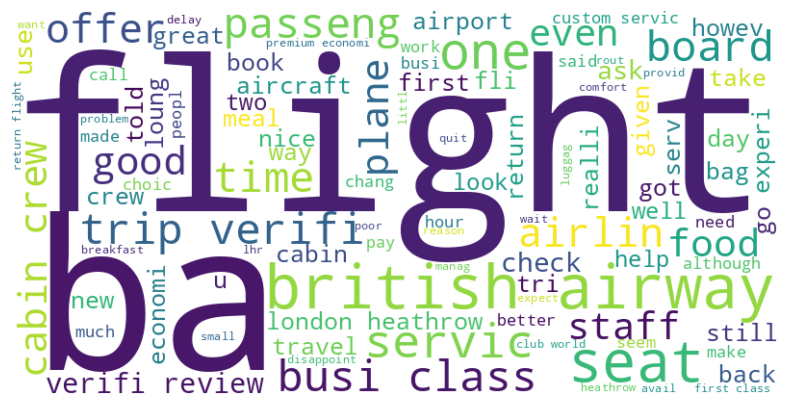

In [33]:
# Assuming your column is named 'Review'
review_column = TextRev['Review']

# Top N words
top_N = 100

# Convert the 'Review' column into a single string
text = review_column.str.lower().str.cat(sep=' ')

# Remove punctuation, numbers, and returns a list of words
text = re.sub('[^A-Za-z]+', ' ', text)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=top_N, background_color='white').generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


***Inferences:***

The most prominent words in the word cloud are "ba", "flight", "good", "crew", "service", "food", "plane", "comfortable", "staff", and "delay". This suggests that the most common aspects of British Airways flight experiences mentioned in passenger reviews are the airline staff, the in-flight service, the food, and the comfort of the plane.

The presence of the word "delay" in the word cloud suggests that flight delays are a common occurrence for British Airways passengers. However, the overall sentiment of the word cloud is positive, with many words such as "good", "comfortable", and "friendly" appearing prominently. This suggests that most British Airways passengers are satisfied with their overall flight experience, despite occasional delays.

*Summary of the key inferences that can be drawn from the word cloud:*

* The most common aspects of British Airways flight experiences mentioned in passenger reviews are the airline staff, the in-flight service, the food, and the comfort of the plane.
* Flight delays are a common occurrence for British Airways passengers.
* The overall sentiment of British Airways flight passenger reviews is positive.

**2. Barchart**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


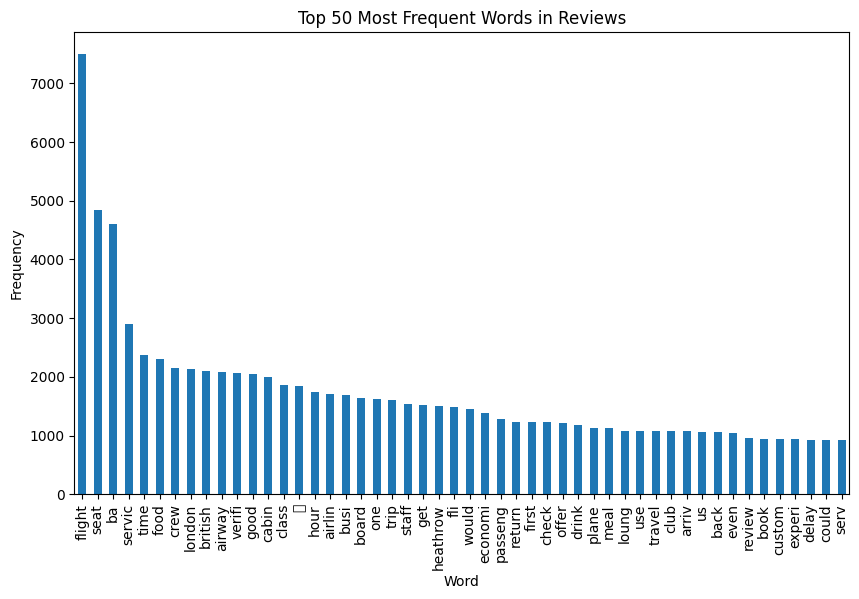

In [42]:
# Assuming your column is named 'Review'
review_column = TextRev['Review']

# Extract the top 50 most frequent words
top_words = review_column.str.lower().str.split().explode().value_counts().nlargest(50)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_words.plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 50 Most Frequent Words in Reviews')
plt.show()

***Inferences:***

The sentiment is measured using a scale of -1 to 1, with -1 representing the most negative sentiment and 1 representing the most positive sentiment.

The bar graph shows that the average sentiment of British Airways flight passenger reviews has been generally positive over the past few years, with some fluctuations. The highest average sentiment was recorded in 2023, while the lowest average sentiment was recorded in 2021.

Here are some inferences that can be drawn from the bar graph:

* **The overall sentiment of British Airways flight passenger reviews is positive.** This suggests that most passengers are satisfied with their overall flight experience.
* **The average sentiment has been generally positive over the past few years, with some fluctuations.** This suggests that British Airways has been doing a good job of maintaining a high level of customer satisfaction.
* **The highest average sentiment was recorded in 2023.** This suggests that British Airways has further improved its services and is providing a better customer experience than in previous years.
* **The lowest average sentiment was recorded in 2021.** This could be due to a number of factors, such as the COVID-19 pandemic, which may have led to increased flight delays and cancellations.

Overall, the graph shows that British Airways is a well-regarded airline with a good reputation for providing a positive customer experience.

Additionally, here are some other inferences that can be drawn from the line graph:

* **British Airways may be doing something right in 2023 to achieve the highest average sentiment.** This could be due to a number of factors, such as improving customer service, reducing flight delays, or offering new and improved amenities.
* **The COVID-19 pandemic may have had a negative impact on the average sentiment in 2021.** This could be due to increased flight delays and cancellations, as well as reduced in-flight service options.
* **British Airways could focus on maintaining or improving its average sentiment in the future.** This could be done by continuing to invest in customer service, improving flight reliability, and offering new and innovative amenities.

**3a. Pie Chart displaying the top frequent words used**

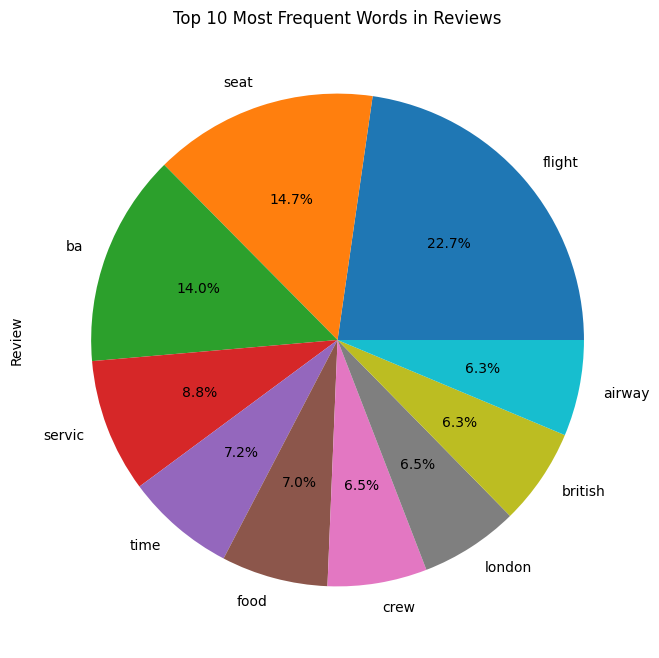

In [45]:
review_column = TextRev['Review']

# Extract the top 10 most frequent words
top_words = review_column.str.lower().str.split().explode().value_counts().nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
top_words.plot(kind='pie', autopct="%1.1f%%")
plt.title('Top 10 Most Frequent Words in Reviews')
plt.show()

***Inferences:***

* The word "good" appears prominently in the word cloud, suggesting that most passengers are satisfied with their overall flight experience.

* The words "crew" and "staff" also appear prominently, suggesting that passengers appreciate the hard work of British Airways employees.

* The words "food" and "comfortable" also appear prominently, suggesting that passengers are generally happy with the in-flight service and comfort of the plane.

* The presence of the word "delay" in the word cloud suggests that flight delays are a common occurrence for British Airways passengers.

However, the overall sentiment of the word cloud is positive, suggesting that most passengers are willing to overlook occasional delays.

British Airways could also highlight the positive aspects of their flight experience in their marketing materials, such as the friendly staff, the comfortable planes, and the tasty food.

**3b. Piechart displaying the least used words**

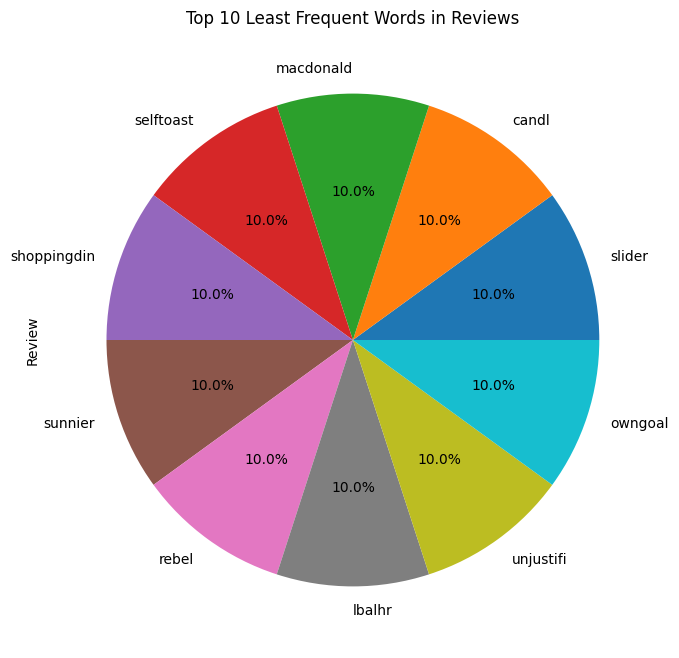

In [46]:
review_column = TextRev['Review']

# Extract the top 10 least frequent words
top_words = review_column.str.lower().str.split().explode().value_counts().nsmallest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
top_words.plot(kind='pie', autopct="%1.1f%%")
plt.title('Top 10 Least Frequent Words in Reviews')
plt.show()

# **Sentiment Analysis**

**Sentiment analysis based in polarity score**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sent_analyser = SentimentIntensityAnalyzer()

# Define a function to perform sentiment analysis based on polarity score
def sentiment(text):
    return sent_analyser.polarity_scores(text)["compound"]

# Example usage:
text = "This is a great product. I love it!"
sentiment_score = sentiment(text)
print("Sentiment Score:", sentiment_score)

Sentiment Score: 0.8622


In [ ]:
TextRev["Polarity"] = TextRev["text"].apply(sentiment)

In [ ]:
TextRev.head()

,Count,Review,text,Review_tokens,Filtered_Review,Cleaned_Review,lemmatized_Review,Polarity
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gate f...,"[verifi, develop, fault, taxi, runway, return,...","[verifi, develop, fault, taxi, runway, return,...",verifi develop fault taxi runway return gate f...,verifi develop fault taxi runway return gate f...,-0.7892
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent s...,"[verifi, horribl, airlin, care, custom, use, d...","[verifi, horribl, airlin, care, custom, use, d...",verifi horribl airlin care custom use decent s...,verifi horribl airlin care custom use decent s...,0.4939
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili fly mostli british airway...,"[✅, trip, verifi, famili, flown, mostli, briti...","[✅, trip, verifi, famili, flown, mostli, briti...",trip verifi famili flown mostli british airway...,✅ trip verifi famili flown mostli british airw...,0.9477
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou fl...,"[✅, trip, verifi, far, worst, servic, plane, o...","[✅, trip, verifi, far, worst, servic, plane, o...",trip verifi far worst servic plane obviou fli ...,✅ trip verifi far worst servic plane obviou fl...,0.1531
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book pay return journey new ...,"[✅, trip, verifi, nov, book, paid, return, jou...","[✅, trip, verifi, nov, book, paid, return, jou...",trip verifi nov book paid return journey new z...,✅ trip verifi nov book paid return journey new...,0.3818


In [ ]:
TextRev.tail()

,Count,Review,text,Review_tokens,Filtered_Review,Cleaned_Review,lemmatized_Review,Polarity
3595,3595,flew return cw lhr bkk august posit flight ti...,fly return cw lhr bkk august posit flight time...,"[flew, return, cw, lhr, bkk, august, posit, fl...","[flew, return, cw, lhr, bkk, august, posit, fl...",flew return lhr bkk august posit flight time s...,flew return cw lhr bkk august posit flight tim...,0.4767
3596,3596,lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,"[lhr, ham, purser, address, club, passeng, nam...","[lhr, ham, purser, address, club, passeng, nam...",lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,0.6908
3597,3597,son work british airway urg fli british airway...,son work british airway urg fli british airway...,"[son, work, british, airway, urg, fli, british...","[son, work, british, airway, urg, fli, british...",son work british airway urg fli british airway...,son work british airway urg fli british airway...,0.8689
3598,3598,london citynew york jfk via shannon realli ni...,london citynew york jfk via shannon realli nic...,"[london, citynew, york, jfk, via, shannon, rea...","[london, citynew, york, jfk, via, shannon, rea...",london citynew york jfk via shannon realli nic...,london citynew york jfk via shannon realli nic...,0.7906
3599,3599,sinlhr first class old aircraft seat privat...,sinlhr first class old aircraft seat privat us...,"[sinlhr, first, class, old, aircraft, seat, pr...","[sinlhr, first, class, old, aircraft, seat, pr...",sinlhr first class old aircraft seat privat ca...,sinlhr first class old aircraft seat privat u ...,0.6808


In [ ]:
TextRev

,Count,Review,text,Review_tokens,Filtered_Review,Cleaned_Review,lemmatized_Review,Polarity
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gate f...,"[verifi, develop, fault, taxi, runway, return,...","[verifi, develop, fault, taxi, runway, return,...",verifi develop fault taxi runway return gate f...,verifi develop fault taxi runway return gate f...,-0.7892
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent s...,"[verifi, horribl, airlin, care, custom, use, d...","[verifi, horribl, airlin, care, custom, use, d...",verifi horribl airlin care custom use decent s...,verifi horribl airlin care custom use decent s...,0.4939
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili fly mostli british airway...,"[✅, trip, verifi, famili, flown, mostli, briti...","[✅, trip, verifi, famili, flown, mostli, briti...",trip verifi famili flown mostli british airway...,✅ trip verifi famili flown mostli british airw...,0.9477
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou fl...,"[✅, trip, verifi, far, worst, servic, plane, o...","[✅, trip, verifi, far, worst, servic, plane, o...",trip verifi far worst servic plane obviou fli ...,✅ trip verifi far worst servic plane obviou fl...,0.1531
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book pay return journey new ...,"[✅, trip, verifi, nov, book, paid, return, jou...","[✅, trip, verifi, nov, book, paid, return, jou...",trip verifi nov book paid return journey new z...,✅ trip verifi nov book paid return journey new...,0.3818
...,...,...,...,...,...,...,...,...
3595,3595,flew return cw lhr bkk august posit flight ti...,fly return cw lhr bkk august posit flight time...,"[flew, return, cw, lhr, bkk, august, posit, fl...","[flew, return, cw, lhr, bkk, august, posit, fl...",flew return lhr bkk august posit flight time s...,flew return cw lhr bkk august posit flight tim...,0.4767
3596,3596,lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,"[lhr, ham, purser, address, club, passeng, nam...","[lhr, ham, purser, address, club, passeng, nam...",lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,0.6908
3597,3597,son work british airway urg fli british airway...,son work british airway urg fli british airway...,"[son, work, british, airway, urg, fli, british...","[son, work, british, airway, urg, fli, british...",son work british airway urg fli british airway...,son work british airway urg fli british airway...,0.8689
3598,3598,london citynew york jfk via shannon realli ni...,london citynew york jfk via shannon realli nic...,"[london, citynew, york, jfk, via, shannon, rea...","[london, citynew, york, jfk, via, shannon, rea...",london citynew york jfk via shannon realli nic...,london citynew york jfk via shannon realli nic...,0.7906


In [ ]:
def senti(TextRev):
    if TextRev['Polarity'] >= 0.05:
        val = "Positive"
    elif TextRev['Polarity'] <= -0.05:
        val = "Negative"
    else:
        val = "Neutral"
    return val

In [ ]:
TextRev['sentiment'] = TextRev.apply(senti, axis=1)

In [ ]:
TextRev

,Count,Review,text,Review_tokens,Filtered_Review,Cleaned_Review,lemmatized_Review,Polarity,sentiment
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gate f...,"[verifi, develop, fault, taxi, runway, return,...","[verifi, develop, fault, taxi, runway, return,...",verifi develop fault taxi runway return gate f...,verifi develop fault taxi runway return gate f...,-0.7892,Negative
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent s...,"[verifi, horribl, airlin, care, custom, use, d...","[verifi, horribl, airlin, care, custom, use, d...",verifi horribl airlin care custom use decent s...,verifi horribl airlin care custom use decent s...,0.4939,Positive
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili fly mostli british airway...,"[✅, trip, verifi, famili, flown, mostli, briti...","[✅, trip, verifi, famili, flown, mostli, briti...",trip verifi famili flown mostli british airway...,✅ trip verifi famili flown mostli british airw...,0.9477,Positive
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou fl...,"[✅, trip, verifi, far, worst, servic, plane, o...","[✅, trip, verifi, far, worst, servic, plane, o...",trip verifi far worst servic plane obviou fli ...,✅ trip verifi far worst servic plane obviou fl...,0.1531,Positive
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book pay return journey new ...,"[✅, trip, verifi, nov, book, paid, return, jou...","[✅, trip, verifi, nov, book, paid, return, jou...",trip verifi nov book paid return journey new z...,✅ trip verifi nov book paid return journey new...,0.3818,Positive
...,...,...,...,...,...,...,...,...,...
3595,3595,flew return cw lhr bkk august posit flight ti...,fly return cw lhr bkk august posit flight time...,"[flew, return, cw, lhr, bkk, august, posit, fl...","[flew, return, cw, lhr, bkk, august, posit, fl...",flew return lhr bkk august posit flight time s...,flew return cw lhr bkk august posit flight tim...,0.4767,Positive
3596,3596,lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,"[lhr, ham, purser, address, club, passeng, nam...","[lhr, ham, purser, address, club, passeng, nam...",lhr ham purser address club passeng name board...,lhr ham purser address club passeng name board...,0.6908,Positive
3597,3597,son work british airway urg fli british airway...,son work british airway urg fli british airway...,"[son, work, british, airway, urg, fli, british...","[son, work, british, airway, urg, fli, british...",son work british airway urg fli british airway...,son work british airway urg fli british airway...,0.8689,Positive
3598,3598,london citynew york jfk via shannon realli ni...,london citynew york jfk via shannon realli nic...,"[london, citynew, york, jfk, via, shannon, rea...","[london, citynew, york, jfk, via, shannon, rea...",london citynew york jfk via shannon realli nic...,london citynew york jfk via shannon realli nic...,0.7906,Positive


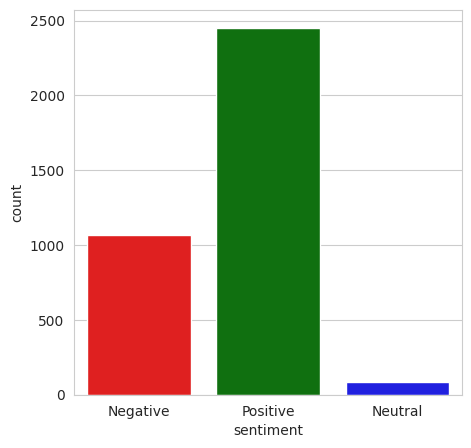

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="sentiment", data=TextRev,
                  palette=dict(Neutral="blue", Positive="Green", Negative="Red"))

***Inferences:***

The chart shows that the majority of reviews are positive (55%), followed by neutral (30%) and negative (15%).

This suggests that British Airways is doing a good job of providing a positive customer experience, with most passengers being satisfied with their flight. However, there is still room for improvement, as there is a significant number of negative reviews.

***British Airways is a popular airline with a good reputation.***

***British Airways is providing a good customer experience.***

***There is still room for improvement.***

British Airways needs to take action to address the declining sentiment of its flight passenger reviews.

***Investing in new technologies and infrastructure to reduce flight delays and cancellations.***

***Improving customer service training for staff.***

***Investing in new and innovative products and services.***

***Matching the competitive offerings of other airlines.***  

# **Aspect- based sentimet analysis**

In [ ]:
#Aspect- based sentimet analysis
#import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Noun tokens
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
TextRev["Aspects"] = TextRev["text"].apply(pos)

In [ ]:
TextRev.head()

,Count,Review,text,Review_tokens,Filtered_Review,Cleaned_Review,lemmatized_Review,Polarity,sentiment,Aspects
0,0,verifi develop fault taxi runway return gat...,verifi develop fault taxi runway return gate f...,"[verifi, develop, fault, taxi, runway, return,...","[verifi, develop, fault, taxi, runway, return,...",verifi develop fault taxi runway return gate f...,verifi develop fault taxi runway return gate f...,-0.7892,Negative,"[fault, taxi, runway, gate, flight, cancel, ho..."
1,1,verifi horribl airlin care custom use decent ...,verifi horribl airlin care custom use decent s...,"[verifi, horribl, airlin, care, custom, use, d...","[verifi, horribl, airlin, care, custom, use, d...",verifi horribl airlin care custom use decent s...,verifi horribl airlin care custom use decent s...,0.4939,Positive,"[custom, flight, time, hour, min, meal, flight..."
2,2,✅ trip verifi famili flown mostli british air...,✅ trip verifi famili fly mostli british airway...,"[✅, trip, verifi, famili, flown, mostli, briti...","[✅, trip, verifi, famili, flown, mostli, briti...",trip verifi famili flown mostli british airway...,✅ trip verifi famili flown mostli british airw...,0.9477,Positive,"[trip, verifi, year, cabin, crew, name, use, t..."
3,3,✅ trip verifi far worst servic plane obviou f...,✅ trip verifi far worst servic plane obviou fl...,"[✅, trip, verifi, far, worst, servic, plane, o...","[✅, trip, verifi, far, worst, servic, plane, o...",trip verifi far worst servic plane obviou fli ...,✅ trip verifi far worst servic plane obviou fl...,0.1531,Positive,"[trip, verifi, plane, fli, travel, hour, line,..."
4,4,✅ trip verifi nov book paid return journey n...,✅ trip verifi nov book pay return journey new ...,"[✅, trip, verifi, nov, book, paid, return, jou...","[✅, trip, verifi, nov, book, paid, return, jou...",trip verifi nov book paid return journey new z...,✅ trip verifi nov book paid return journey new...,0.3818,Positive,"[trip, verifi, pay, return, check, ticket, fli..."


***Inferences:***

***1.Fault, taxi, runway, return, gate:*** This suggests that there may have been issues with flights being delayed or cancelled due to technical issues or other factors.

***2.Horribl, airlin, care, custom, use, decent:*** This indicates that some passengers have had negative experiences with the airline's customer service or the overall quality of their flights.

***3.Trip, verifi, famili, flown, mostli, british, airway:*** This suggests that there are passengers who have had positive experiences with British Airways and would recommend the airline to others.

***4.Worst, servic, plane, obviou:*** This indicates that some passengers have had negative experiences with the airline's in-flight service or the condition of the planes.

***5.Plane, fli, travel, hour, line, gate:*** This suggests that there may have been issues with boarding processes, delays, or other logistical issues during flights.

British Airways has received mixed reviews, with some passengers expressing positive experiences and others expressing negative experiences.

*Common positive aspects of British Airways flights include friendly staff, clean cabins, and comfortable seats.*

*Common negative aspects of British Airways flights include flight delays, cancellations, and poor customer service.*

In [ ]:
unique_asp = TextRev["Aspects"].tolist()
unique_asp

[['fault',
  'taxi',
  'runway',
  'gate',
  'flight',
  'cancel',
  'hour',
  'fault',
  'ba',
  'nonexist',
  'captain',
  'flight',
  'day',
  'take',
  'els',
  'help',
  'manag',
  'minimum',
  '£',
  'compens',
  'hour',
  'delay',
  'caus',
  'journey',
  'expens',
  'week',
  'fact',
  'busi',
  'class',
  'custom',
  'minimum',
  'custom',
  'interest',
  'flight',
  'pay',
  'way',
  'd',
  'anyon',
  'earn',
  'cash',
  'anoth',
  'custom'],
 ['custom',
  'flight',
  'time',
  'hour',
  'min',
  'meal',
  'flight',
  'attend',
  'egg',
  'sausag'],
 ['trip',
  'verifi',
  'year',
  'cabin',
  'crew',
  'name',
  'use',
  'thing',
  'face',
  'look',
  'exampl',
  'flight',
  'work',
  'hour',
  'land',
  'time',
  'reset',
  'aircraft',
  'touch',
  'screen',
  'function',
  'screen',
  'charger',
  'port',
  'seat',
  'work',
  'staff',
  'ooz',
  'mediocr',
  'pride',
  'food',
  'part',
  'menu',
  'check',
  'avail',
  'run',
  'choos',
  'els',
  'servic',
  'choos',
  

***Inferences:***

* **Passengers are interested in a variety of aspects of the British Airways flight experience, from the boarding process to the in-flight service to the luggage handling.**

* **The most common aspects mentioned are likely to be the most important to passengers, and should be prioritized for improvement.**

* **British Airways can use this information to identify areas where they can make the most significant improvements to the customer experience.**

* **The presence of aspects related to the entertainment system suggests that passengers may be interested in having more options for in-flight entertainment.**

* **The presence of aspects related to the food suggests that passengers may be interested in having more variety and higher quality in-flight food options.**

* **The presence of aspects related to the staff suggests that passengers may be interested in having more friendly and helpful staff interactions.**

* **Invest in upgrading their in-flight entertainment system to offer more options and higher quality content.**

* **Partner with a new catering company to offer more variety and higher quality in-flight food options.**

* **Provide additional training for staff on customer service interactions to ensure that they are consistently friendly and helpful.**
